In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv("ykt_jyrz_2018.txt",sep = ";", encoding = 'utf8')
df=df[['XH','JYSJ','JYDD']]

name=['中心食堂一层','中心食堂二层','中心食堂三层','中心食堂清真','五食堂一层','五食堂二层','五食堂三层','开发区校区食堂','沁园餐厅','七食堂1楼','七食堂2楼','九食堂清真餐厅','盘锦校区B12食堂','盘锦校区B13食堂']
df=df.loc[df['JYDD'].isin(name)]

df=df[['XH','JYSJ']]
df['JYSJ'],df['SJ'] = df['JYSJ'].str.split(' ',1).str
df['SJ'],df['H']=df['SJ'].str.split(':',1).str

df=df[['XH','SJ']]
# print(df)
df.to_csv('xhsj.csv',encoding='utf-8',index=False)



In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv("xhsj.csv",encoding = 'utf8')
time=['05','06','07']
df=df.loc[df['SJ'].isin(time)]
df=df.groupby(by='XH').count()
df=df[:-8]
print(df)
df.to_csv('breakfastcount.csv',header=None,encoding='utf-8')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

# 合并
df_3 = pd.read_csv("breakfastcount.csv", names=['xh','count'],encoding = 'utf8')
df_4 = pd.read_csv("softwaregrade.csv",encoding = 'utf8')

# df_3.astype(int)
result=pd.merge(df_3,df_4) # 默认取交集

print(result)
result.to_csv('breakfastgrade.csv', index=False,encoding='utf-8')


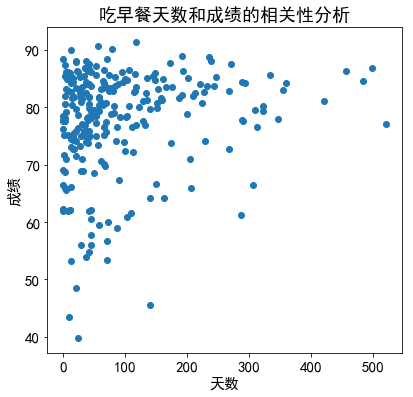

吃早餐天数和成绩的相关系数为： 0.17207969695234004


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import mpl_toolkits.mplot3d

df = pd.read_csv("breakfastgrade.csv", encoding = 'utf8')

matplotlib.rcParams['font.family'] = 'SimHei' #配置中文字体
matplotlib.rcParams['font.size'] =  15   # 更改默认字体大小

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(df['count'], df['kccj'])
plt.title('吃早餐天数和成绩的相关性分析')
plt.xlabel('天数')
plt.ylabel('成绩')

plt.show()
print("吃早餐天数和成绩的相关系数为：",df['count'].corr(df['kccj']))